## Rasch model for simulated and real data.

The real data is from -> M. Vahdat, L. Oneto, D. Anguita, M. Funk, M. Rauterberg.: A learning analytics approach to correlate the academic achievements of students with interaction data from an educational simulator. In: G. Conole et al. (eds.): EC-TEL 2015, LNCS 9307, pp. 352-366. Springer (2015). DOI: 10.1007/978-3-319-24258-3 26

The grade score will be given a bolean value, in which if a student score half the points of a question it is evaluated as passed.


Loading the data as .xlsx file:

In [5]:
import os, scipy, matplotlib, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Dir = r'C:\Users\david\OneDrive\Davids_doc\DTU\12th_Semester\02460_Advanced_Machine_Learning\Edutech\EPM Dataset 2\Data'
gradeDir = Dir+r'\final_grades.xlsx'
intermediateDir = Dir+r'\intermediate_grades.xlsx'

dfGrade = pd.read_excel(gradeDir, sheet_name=r'Exam (Second time)')
dfGrade.head()

,Student ID,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),ES 3.2 (2 points),ES 3.3 (2 points),ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points),TOTAL (100 points)
0,1,2.0,3.0,1.0,0.5,1.0,2,2.0,2,3,15,10.0,2.0,10.0,3.0,25.0,13.0,94.5
1,2,2.0,3.0,2.0,0.5,1.0,2,0.0,2,3,15,2.0,0.0,5.0,1.5,5.0,0.0,44.0
2,4,2.0,3.0,1.0,0.5,1.0,2,0.0,2,0,3,4.0,0.0,1.5,0.0,5.0,5.0,30.0
3,5,2.0,3.0,2.0,1.5,1.0,2,2.0,2,3,3,2.0,1.5,9.0,1.5,2.0,1.0,38.5
4,7,2.0,3.0,1.0,1.5,1.0,2,2.0,2,3,15,10.0,1.0,2.5,0.0,20.0,12.0,78.0


### Data-preprocess ###
Here the data is sorted and normalized so each given grade is a bolean value.

In [6]:
headQ = list(dfGrade)[1:]
# print(headQ)

normPoint = dfGrade[headQ].max()[0:16]
# print(normPoint)

bolGrade = (dfGrade[headQ]/normPoint).round()
# print(bolGrade)

dfData = dfGrade.copy()
dfData[headQ] = bolGrade[headQ]
dfRaschD = dfData[headQ[0:-1]]
dfRaschD.head(5)

,ES 1.1 (2 points),ES 1.2 (3 points),ES 2.1 (2 points),ES 2.2 (3 points),ES 3.1 (1 points),ES 3.2 (2 points),ES 3.3 (2 points),ES 3.4 (2 points),ES 3.5 (3 points),ES 4.1 (15 points),ES 4.2 (10 points),ES 5.1 (2 points),ES 5.2 (10 points),ES 5.3 (3 points),ES 6.1 (25 points),ES 6.2 (15 points)
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0


## Rasch implementation with simmed data ##
We simmulate the Rasch data by sampleing the student abilities $\beta_n$ and test difficulty $\delta_j$ from a normal distribution.
These variables are then used to calculate the percentage for a given dichotomous data value from.
$$P\{X_{ni} = 1\} = \frac{e^{\beta_n-\delta_j}}{1+e^{\beta_n-\delta_j}}$$


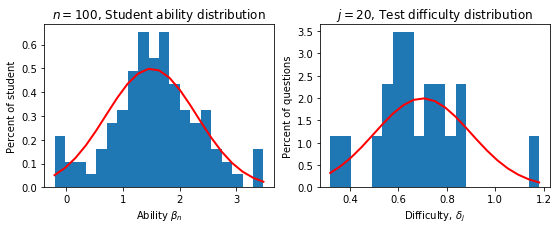

In [7]:
# import string

np.random.seed(10)

jTest = 20
nStudent = 100
# letters = list(string.ascii_lowercase[:jTest])

# sim students
sdStu = 0.8
meanStu = 1.5
beta = np.random.normal(meanStu, sdStu, nStudent)
# sim test difficulty
sdTest = 0.2
meanTest = 0.7
delta = np.random.normal(meanTest, sdTest, jTest)

#plot simmulation
fig = plt.figure(figsize=(14,3))
fig.tight_layout()
ax1 = fig.add_subplot(131)
ax1.set_xlabel(r'Ability $\beta_n$')
ax1.set_ylabel('Percent of student')
ax1.set_title("$n=100$, Student ability distribution")
ountStu, binsStu, ignoredStu = plt.hist(beta, bins=20, normed=True)
plt.plot(binsStu, 1/(sdStu*np.sqrt(2*np.pi))*np.exp(-(binsStu-meanStu)**2/(2*sdStu**2)), linewidth=2, color='r')
ax2 = fig.add_subplot(132)
ax2.set_xlabel(r'Difficulty, $\delta_j$')
ax2.set_ylabel('Percent of questions')
ax2.set_title("$j=20$, Test difficulty distribution")
ountTest, binsTest, ignoredTest = plt.hist(delta, bins=20, normed=True)
plt.plot(binsTest, 1/(sdTest*np.sqrt(2*np.pi))*np.exp(-(binsTest-meanTest)**2/(2*sdTest**2)), linewidth=2, color='r')

# print(beta); print(delta)

### Simmulation of Rasch values ###

In [8]:
pRasch = np.zeros((nStudent,jTest))
SimRaschD = np.zeros((nStudent,jTest))

for n in range (nStudent):
    for j in range(jTest):
        pRasch[n,j] = np.exp(beta[n]-delta[j])/(1+np.exp(beta[n]-delta[j]))
        SimRaschD[n,j] = np.random.binomial(1,pRasch[n,j])


print(type(pRasch))
print(type(SimRaschD))
dfSimRaschD=pd.DataFrame(SimRaschD)
dfSimRaschD.head(5)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


Likelihood function of Rasch model

In [136]:
def gradient(lam,data_x,data_y,w,b):
    (n,d)=data_x.shape
    return (lam*w+b/n-1/n*data_x.T.dot(np.multiply(data_y,1/(1+np.exp(np.multiply(data_y,(data_x.dot(w))))))))

r_n = np.sum(SimRaschD, axis=1)
s_i = np.sum(SimRaschD, axis=0)

# logLike = np.sum()